## Run First

In [1]:
import scipy
import numpy as np
from numpy import linalg as LA
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize

In [2]:
# importing algorithm functions
import sys
sys.path.insert(1, '/Users/jennytran/Downloads')
from gk import *
from mwrko import *
from gko import *

In [3]:
from scipy import io
divorce = scipy.io.loadmat('/Users/jennytran/Downloads/divorce.mat')
photogrammetry = scipy.io.loadmat('/Users/jennytran/Downloads/photogrammetry.mat')
Stranke94 = scipy.io.loadmat('/Users/jennytran/Downloads/Stranke94.mat')
well1033 = scipy.io.loadmat('/Users/jennytran/Downloads/well1033.mat')

## Real-world Experiments

### Divorce

In [18]:
div = (divorce['Problem'][0][0]['A'])
div = div.toarray()
for n in div:
    div = np.delete(div, np.where(np.linalg.norm(n) == 0), axis = 0)
div = normalize(div, axis=1, norm='l2')
x = np.random.rand(div.shape[1])
y = div @ x

In [19]:
div.shape

(50, 9)

In [17]:
gk_start_div = process_time()
gk_div = gk(div,x,y, 0.5*10**-5)
gk_stop_div = process_time()

In [24]:
gko_start_div = process_time()
gko_div = gko(div,x,y, 0.5*10**-5)
gko_stop_div = process_time()

/Users/jennytran/Downloads/gko.py:35: RuntimeWarning: invalid value encountered in true_divide
  i_k1 = np.argmax(resid/np.sqrt(denom))
/Users/jennytran/Downloads/gko.py:36: RuntimeWarning: invalid value encountered in true_divide
  t = resid/np.sqrt(denom)
/Users/jennytran/Downloads/gko.py:48: RuntimeWarning: invalid value encountered in double_scalars
  alpha = r / h_ik


KeyboardInterrupt: 

In [38]:
mwrko_start_div = process_time()
mwrko_div = mwrko(div,x,y, 0.5*10**-5)
mwrko_stop_div = process_time()

In [42]:
# cpu data
gk_cpu_div = gk_stop_div - gk_start_div
gko_cpu_div = gko_stop_div - gko_start_div
mwrko_cpu_div = mwrko_stop_div - mwrko_start_div

NameError: name 'gko_stop_div' is not defined

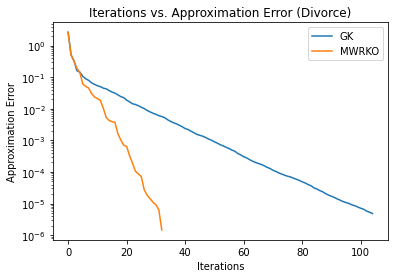

In [40]:
plt.semilogy(np.arange(gk_div[0]), gk_div[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_div[0]), gko_div[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_div[0]), mwrko_div[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Divorce)')
plt.legend()

In [41]:
plt.semilogy(np.linspace(0,gk_cpu_div,gk_div[0]), gk_div[1],linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_div,gko_div[0]), gko_div[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_div,mwrko_div[0]), mwrko_div[1],linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('Approximation Error')
plt.title('CPU vs. Approximation Error (Divorce)')
plt.legend()

NameError: name 'gk_cpu_div' is not defined

### Photogrammetry

In [29]:
pho = (photogrammetry['Problem'][0][0]['A'])
pho = pho.toarray()
for n in pho:
    pho = np.delete(pho, np.where(np.linalg.norm(n) == 0), axis = 0)
pho = normalize(pho, axis=1, norm='l2')
x = np.random.rand(pho.shape[1])
y = pho @ x

In [30]:
pho.shape

(1254, 390)

In [31]:
gk_start_pho = process_time()
gk_pho = gk(pho,x,y,0.5*10**-5)
gk_stop_pho = process_time()

KeyboardInterrupt: 

In [ ]:
gko_start_pho = process_time()
gko_pho = gko(pho,x,y,0.5*10**-5)
gko_stop_pho = process_time()

In [ ]:
mwrko_start_pho = process_time()
mwrko_pho = mwrko(pho,x,y,0.5*10**-5)
mwrko_stop_pho = process_time()

In [ ]:
# cpu data
gk_cpu_pho = gk_stop_pho - gk_start_pho
gko_cpu_pho = gko_stop_pho - gko_start_pho
mwrko_cpu_pho = mwrko_stop_pho - mwrko_start_pho

In [ ]:
plt.semilogy(np.arange(gk_pho[0]), gk_pho[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_pho[0]), gko_pho[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_pho[0]), mwrko_pho[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (Photogrammetry)')
plt.legend()

In [ ]:
plt.semilogy(np.linspace(0,gk_cpu_pho,gk_pho[0]), gk_pho[1],linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_pho,gko_pho[0]), gko_pho[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_pho,mwrko_pho[0]), mwrko_pho[1],linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('Approximation Error')
plt.title('CPU vs. Approximation Error (Photogrammetry)')
plt.legend()

### Stranke94

In [4]:
stranke = Stranke94['Problem'][0][0]['A']
stranke = stranke.toarray()
for n in stranke:
    stranke = np.delete(stranke, np.where(np.linalg.norm(n) == 0), axis = 0)
x = np.random.rand(10)
y = stranke @ x

In [5]:
stranke.shape

(10, 10)

In [6]:
gk_start_stranke = process_time()
gk_stranke = gk(stranke,x,y,0.5*10**-5)
gk_stop_stranke = process_time()

In [7]:
gko_start_stranke = process_time()
gko_stranke = gko(stranke,x,y,0.5*10**-5)
gko_stop_stranke = process_time()

In [8]:
mwrko_start_stranke = process_time()
mwrko_stranke = mwrko(stranke,x,y,0.5*10**-5)
mwrko_stop_stranke = process_time()

In [9]:
# cpu data
gk_cpu_stranke = gk_stop_stranke - gk_start_stranke
gko_cpu_stranke = gko_stop_stranke - gko_start_stranke
mwrko_cpu_stranke = mwrko_stop_stranke - mwrko_start_stranke

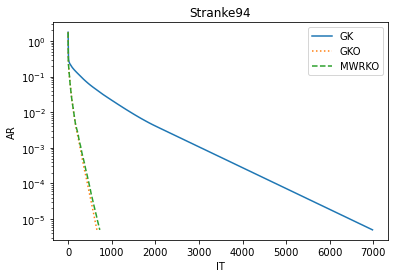

In [12]:
plt.semilogy(np.arange(gk_stranke[0]), gk_stranke[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_stranke[0]), gko_stranke[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_stranke[0]), mwrko_stranke[1], linestyle = 'dashed', label = 'MWRKO')
plt.xlabel('IT')
plt.ylabel('AR')
plt.title('Stranke94')
plt.legend()

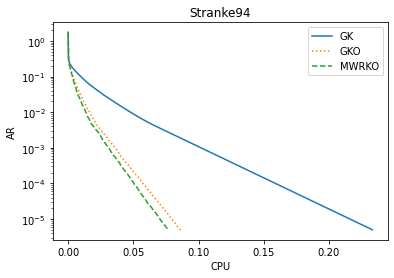

In [14]:
plt.semilogy(np.linspace(0,gk_cpu_stranke,gk_stranke[0]), gk_stranke[1],linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_stranke,gko_stranke[0]), gko_stranke[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_stranke,mwrko_stranke[0]), mwrko_stranke[1],linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('AR')
plt.title('Stranke94')
plt.legend()

### well1033

In [12]:
wel = well1033["Problem"][0][0]["A"]
wel = wel.toarray()
for n in wel:
    wel = np.delete(wel, np.where(np.linalg.norm(n) == 0), axis = 0)
x = np.random.rand(wel.shape[1])
y = wel @ x

In [13]:
wel.shape

(1033, 320)

In [14]:
gk_start_wel = process_time()
gk_wel = gk(wel,x,y,0.5*10**-5)
gk_stop_wel = process_time()

In [ ]:
gko_start_wel = process_time()
gko_wel = gko(wel,x,y,0.5*10**-5)
gko_stop_wel = process_time()

In [ ]:
mwrko_start_wel = process_time()
mwrko_wel = mwrko(wel,x,y,0.5*10**-5)
mwrko_stop_wel = process_time()

In [ ]:
plt.semilogy(np.arange(gk_wel[0]), gk_wel[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_wel[0]), gko_wel[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_wel[0]), mwrko_wel[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('Approximation Error')
plt.title('Iterations vs. Approximation Error (well1033)')
plt.legend()

In [ ]:
plt.semilogy(np.linspace(0,gk_cpu_wel,gk_wel[0]), gk_wel[1],linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_wel,gko_wel[0]), gko_wel[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_wel,mwrko_wel[0]), mwrko_wel[1],linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('Approximation Error')
plt.title('CPU vs. Approximation Error (Stranke94)')
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee1e9016-236e-4f47-b4b5-346be0ac74ad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>